In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("data\Orissa.csv", encoding='ISO-8859-1',low_memory=False)

df

CORPORATE_IDENTIFICATION_NUMBER  \
0               L02001OR1982PLC001101   
1               L05004OR1989PLC002264   
2               L14100OR1910GOI033904   
3               L14102OR1991PLC002834   
4               L14103OR2000PLC006230   
...                               ...   
30473           U99999OR1990PLC002652   
30474           U99999OR1991PTC002787   
30475           U99999OR1994PTC031615   
30476           U99999OR2001PTC006618   
30477           U99999OR2006PTC008658   

                                   Company_Name             Company_status  \
0                  MANGALAM TIMBER PRODUCTS LTD                     Active   
1                SURYO FOODS AND INDUSTRIES LTD                     Active   
2          THE BISRA STONE LIME COMPANY LIMITED                     Active   
3                    SUN GRANITE EXPORT LIMITED                     Active   
4          ARSS INFRASTRUCTURE PROJECTS LIMITED                     Active   
...                                         ...                        ...   
30473      UTKAL MUNUFACTURING AND SERGICES LTD  Not Available for eFiling   
30474     KEJRIWAL DISTRIBUTORS PRIVATE LIMITED                 Strike Off   
30475          SUYOG TELEMATICS PRIVATE LIMITED                     Active   
30476            NIRMALYA FOODS PRIVATE LIMITED                     Active   
30477  SURYAA KIRAN CONSULTANCY PRIVATE LIMITED                 Strike Off   

      Company_class           Company_Category Company_sub_category  \
0            Public  Company limited by Shares     Non-govt company   
1            Public  Company limited by Shares     Non-govt company   
2            Public  Company limited by Shares   Union Govt company   
3            Public  Company limited by Shares     Non-govt company   
4            Public  Company limited by Shares     Non-govt company   
...             ...                        ...                  ...   
30473        Public  Company limited by Shares     Non-govt company   
30474       Private  Company limited by Shares     Non-govt company   
30475       Private  Company limited by Shares     Non-govt company   
30476       Private  Company limited by Shares     Non-govt company   
30477       Private  Company limited by Shares     Non-govt company   

      DATE_OF_REGISTRATION REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL  \
0                 27-08-82           Orissa       600000000     183295000.0   
1                 12-05-89           Orissa       100000000      39600000.0   
2                 01-10-10           Orissa       875000000     872863000.0   
3                 30-05-91           Orissa       110000000     106786000.0   
4                 17-05-00           Orissa       550000000     227379660.0   
...                    ...              ...             ...             ...   
30473             07-11-90           Orissa         1000000             0.0   
30474             02-04-91           Orissa         1500000             0.0   
30475             16-11-94           Orissa         1500000        850000.0   
30476             01-10-01           Orissa          500000        300000.0   
30477             30-03-06           Orissa         2000000        100000.0   

       Industrial_Class             PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
0                  2001   Forestry, logging and related service activities   
1                  5004  Fishing, aquaculture and service activities in...   
2                 14100                         Other mining and quarrying   
3                 14102                         Other mining and quarrying   
4                 14103                         Other mining and quarrying   
...                 ...                                                ...   
30473             99999          Extraterritorial organizations and bodies   
30474             99999          Extraterritorial organizations and bodies   
30475             99999          Extraterritorial organizations and bodi

In [10]:

# Filter out rows with unknown or invalid values in 'DATE_OF_REGISTRATION'
df = df[pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True).notna()]

# Convert 'DATE_OF_REGISTRATION' to datetime format
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)

# Extract year from the registration date
df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year

In [11]:
# Check for missing values
df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
Company_Name                                  0
Company_status                                0
Company_class                                 4
Company_Category                              4
Company_sub_category                          4
DATE_OF_REGISTRATION                          0
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
Industrial_Class                              0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
Registered_Office_Address                     0
REGISTRAR_OF_COMPANIES                        0
EMAIL_ADDR                                 4399
Latest_Year_AR                            13999
Latest_Year_BS                            14005
Registration_Year                             0
dtype: int64

In [12]:
df=df.drop(['DATE_OF_REGISTRATION','EMAIL_ADDR'],axis=1)
df

CORPORATE_IDENTIFICATION_NUMBER  \
0               L02001OR1982PLC001101   
1               L05004OR1989PLC002264   
2               L14100OR1910GOI033904   
3               L14102OR1991PLC002834   
4               L14103OR2000PLC006230   
...                               ...   
30473           U99999OR1990PLC002652   
30474           U99999OR1991PTC002787   
30475           U99999OR1994PTC031615   
30476           U99999OR2001PTC006618   
30477           U99999OR2006PTC008658   

                                   Company_Name             Company_status  \
0                  MANGALAM TIMBER PRODUCTS LTD                     Active   
1                SURYO FOODS AND INDUSTRIES LTD                     Active   
2          THE BISRA STONE LIME COMPANY LIMITED                     Active   
3                    SUN GRANITE EXPORT LIMITED                     Active   
4          ARSS INFRASTRUCTURE PROJECTS LIMITED                     Active   
...                                         ...                        ...   
30473      UTKAL MUNUFACTURING AND SERGICES LTD  Not Available for eFiling   
30474     KEJRIWAL DISTRIBUTORS PRIVATE LIMITED                 Strike Off   
30475          SUYOG TELEMATICS PRIVATE LIMITED                     Active   
30476            NIRMALYA FOODS PRIVATE LIMITED                     Active   
30477  SURYAA KIRAN CONSULTANCY PRIVATE LIMITED                 Strike Off   

      Company_class           Company_Category Company_sub_category  \
0            Public  Company limited by Shares     Non-govt company   
1            Public  Company limited by Shares     Non-govt company   
2            Public  Company limited by Shares   Union Govt company   
3            Public  Company limited by Shares     Non-govt company   
4            Public  Company limited by Shares     Non-govt company   
...             ...                        ...                  ...   
30473        Public  Company limited by Shares     Non-govt company   
30474       Private  Company limited by Shares     Non-govt company   
30475       Private  Company limited by Shares     Non-govt company   
30476       Private  Company limited by Shares     Non-govt company   
30477       Private  Company limited by Shares     Non-govt company   

      REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL  Industrial_Class  \
0               Orissa       600000000     183295000.0              2001   
1               Orissa       100000000      39600000.0              5004   
2               Orissa       875000000     872863000.0             14100   
3               Orissa       110000000     106786000.0             14102   
4               Orissa       550000000     227379660.0             14103   
...                ...             ...             ...               ...   
30473           Orissa         1000000             0.0             99999   
30474           Orissa         1500000             0.0             99999   
30475           Orissa         1500000        850000.0             99999   
30476           Orissa          500000        300000.0             99999   
30477           Orissa         2000000        100000.0             99999   

                  PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
0       Forestry, logging and related service activities   
1      Fishing, aquaculture and service activities in...   
2                             Other mining and quarrying   
3                             Other mining and quarrying   
4                             Other mining and quarrying   
...                                                  ...   
30473          Extraterritorial organizations and bodies   
30474          Extraterritorial organizations and bodies   
30475          Extraterritorial organizations and bodies   
30476          Extraterritorial organizations and bodies   
30477          Extraterritorial organizations and bodies   

                               Registered_Office_Address  \
0      VILL: KUSUMI PO: & DIS

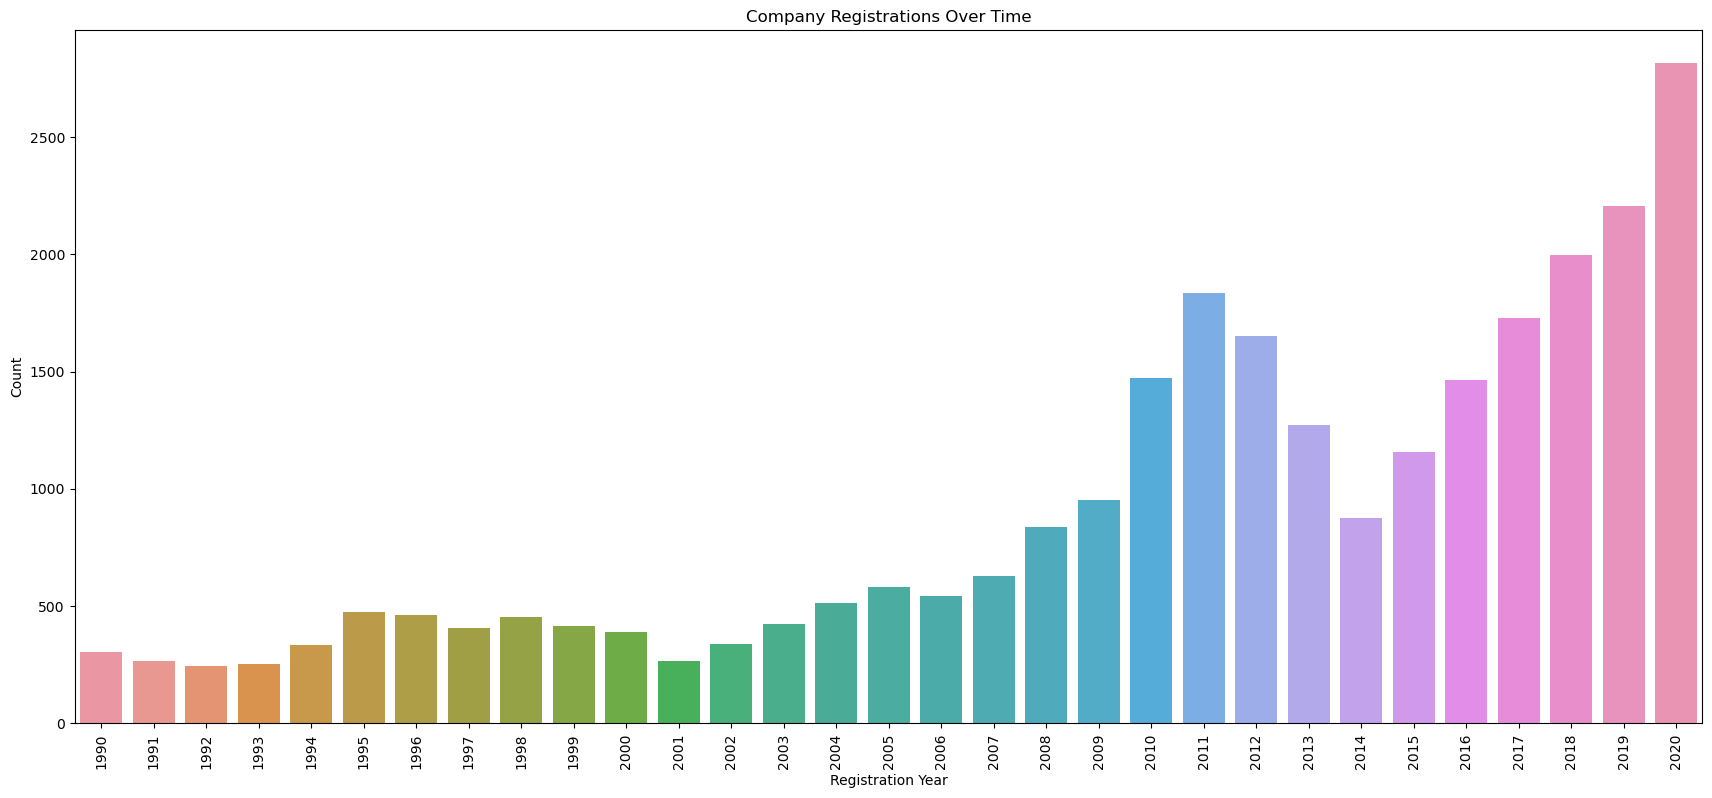

In [13]:
# EDA - Trends over time
plt.figure(figsize=(21, 9))
sns.countplot(x='Registration_Year', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Company Registrations Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

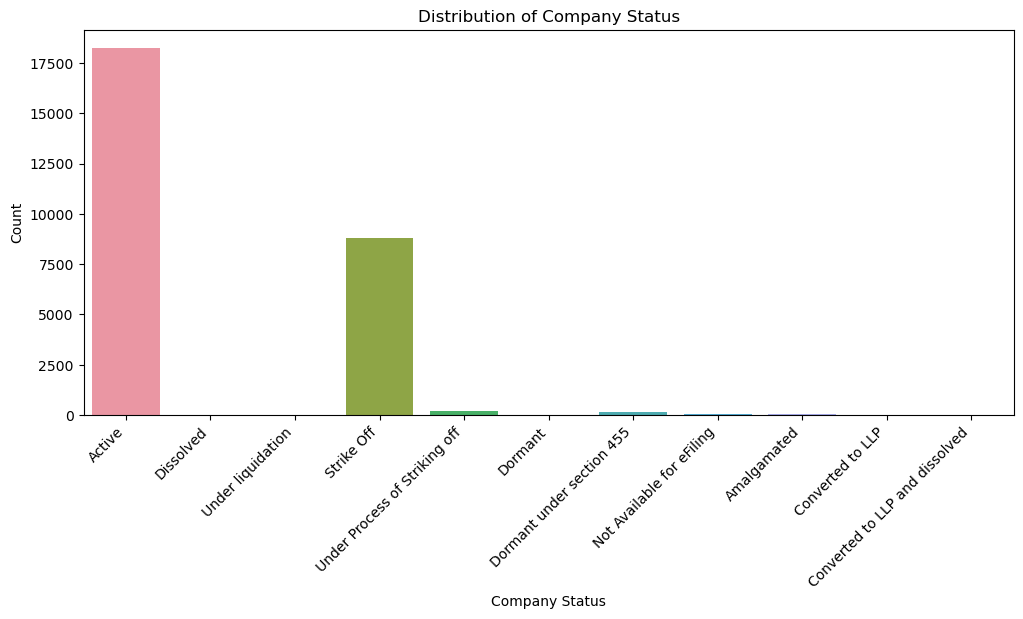

In [14]:
# EDA - Company Status
plt.figure(figsize=(12, 5))
sns.countplot(x='Company_status', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Status')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

In [15]:
# EDA - Industrial Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Industrial_Class', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)].head(10))
plt.title('Distribution of Industrial Classes')
plt.xlabel('Industrial Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

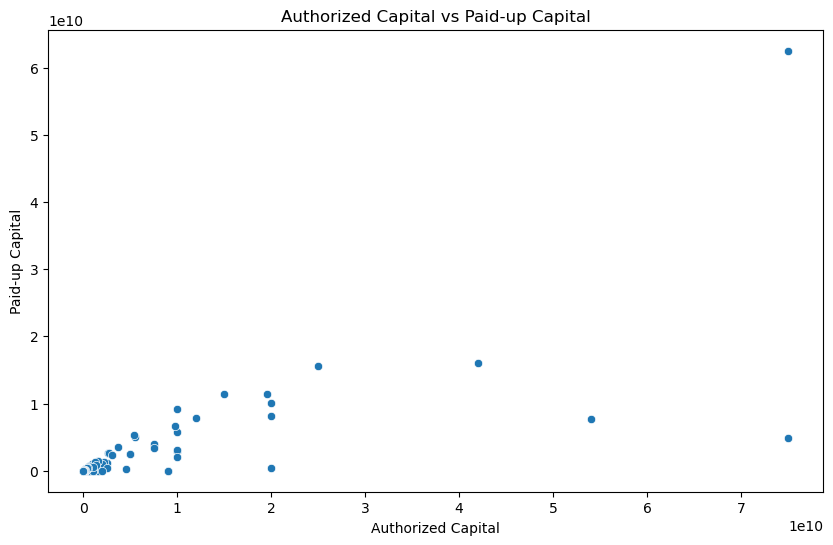

In [16]:
# EDA - Relationship between Authorized Capital and Paid-up Capital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AUTHORIZED_CAP', y='PAIDUP_CAPITAL', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Authorized Capital vs Paid-up Capital')
plt.xlabel('Authorized Capital')
plt.ylabel('Paid-up Capital')
plt.show()

In [17]:
# Print the unique values in the 'Company_Category' column
print(df['Company_Category'].unique())

['Company limited by Shares' 'Company Limited by Guarantee'
 'Unlimited Company' nan]


In [18]:
import numpy as np
df['Company_Category'] =df['Company_Category'].replace(' ',np.nan)

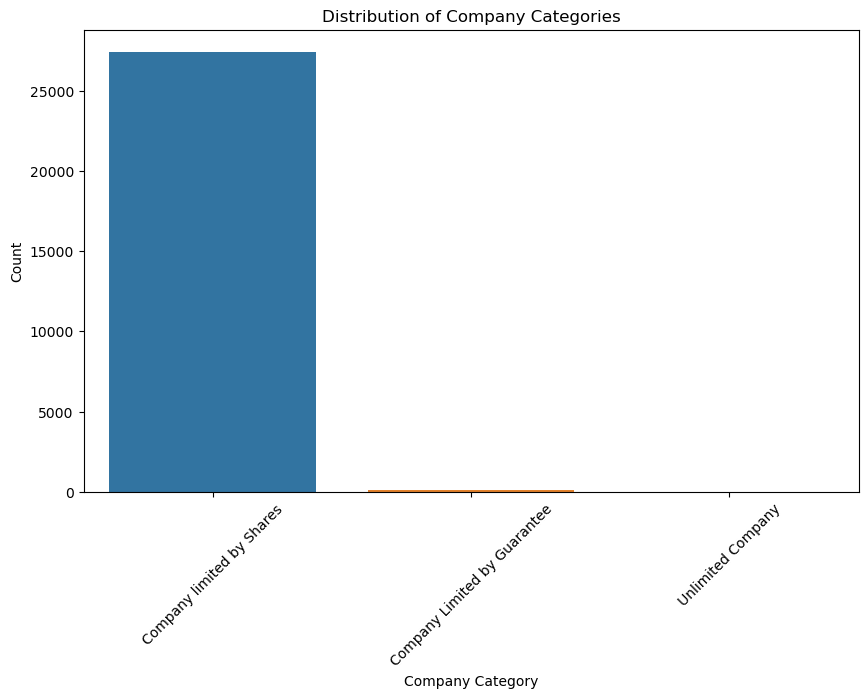

In [19]:
# EDA - Distribution of Company Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Company_Category', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Categories')
plt.xlabel('Company Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

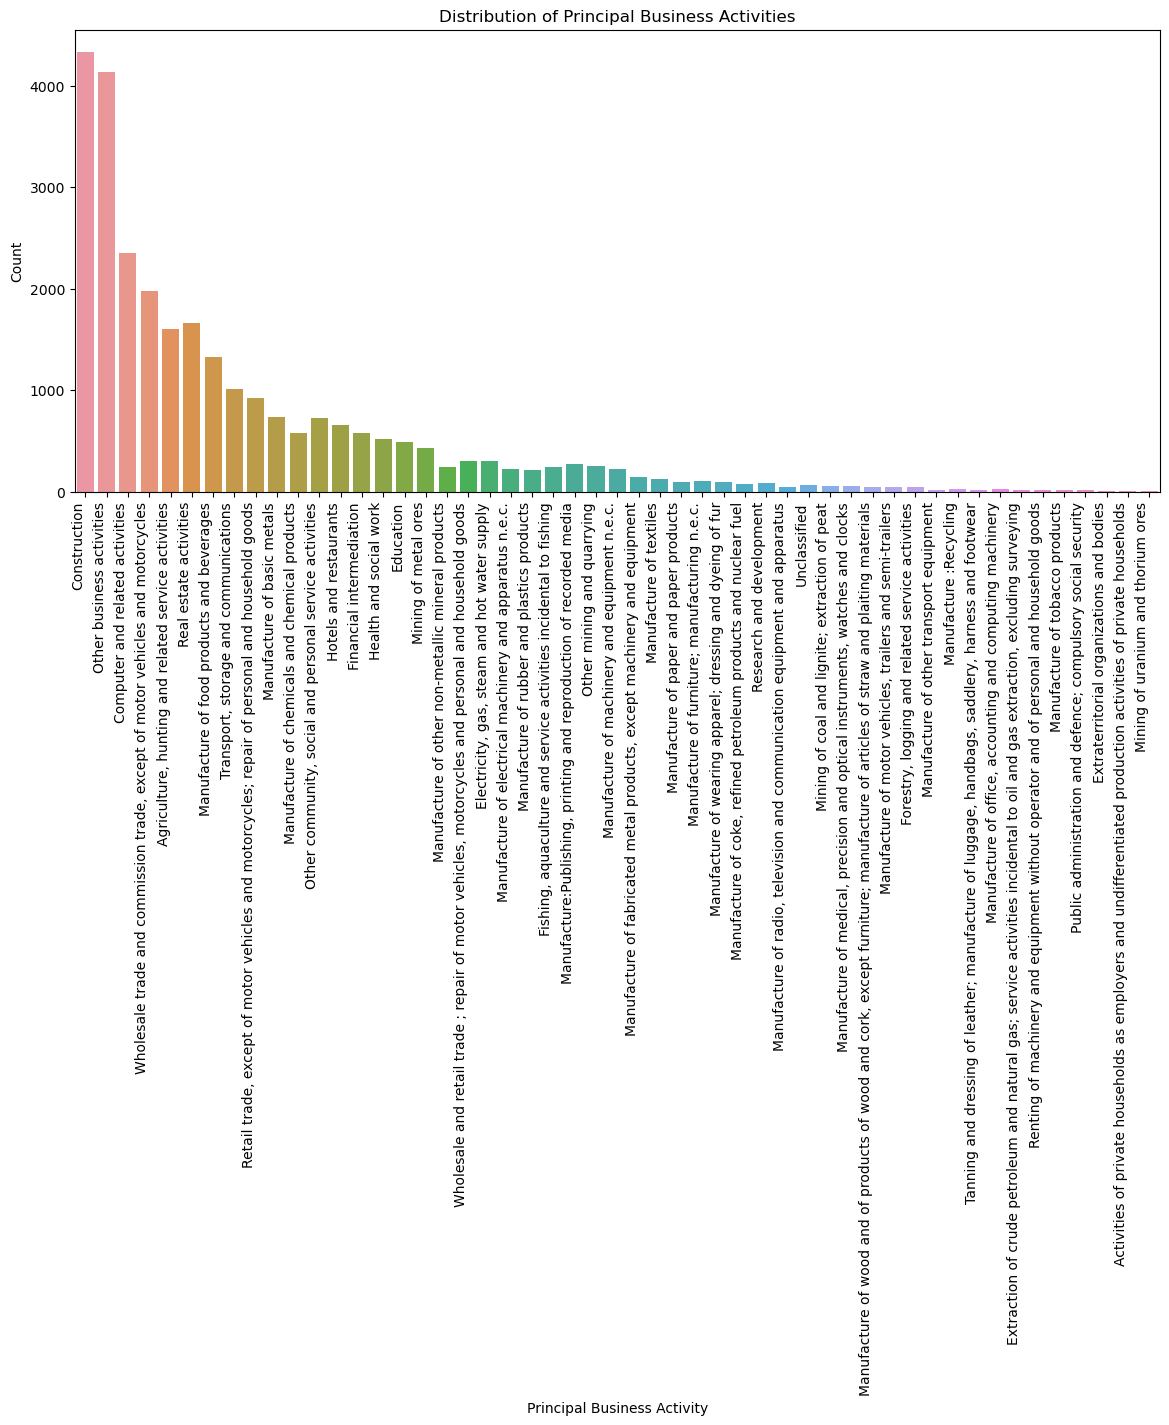

In [20]:
# EDA - Distribution of Principal Business Activities
plt.figure(figsize=(14, 6))
sns.countplot(x='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)], order=df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().index)
plt.title('Distribution of Principal Business Activities')
plt.xlabel('Principal Business Activity')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

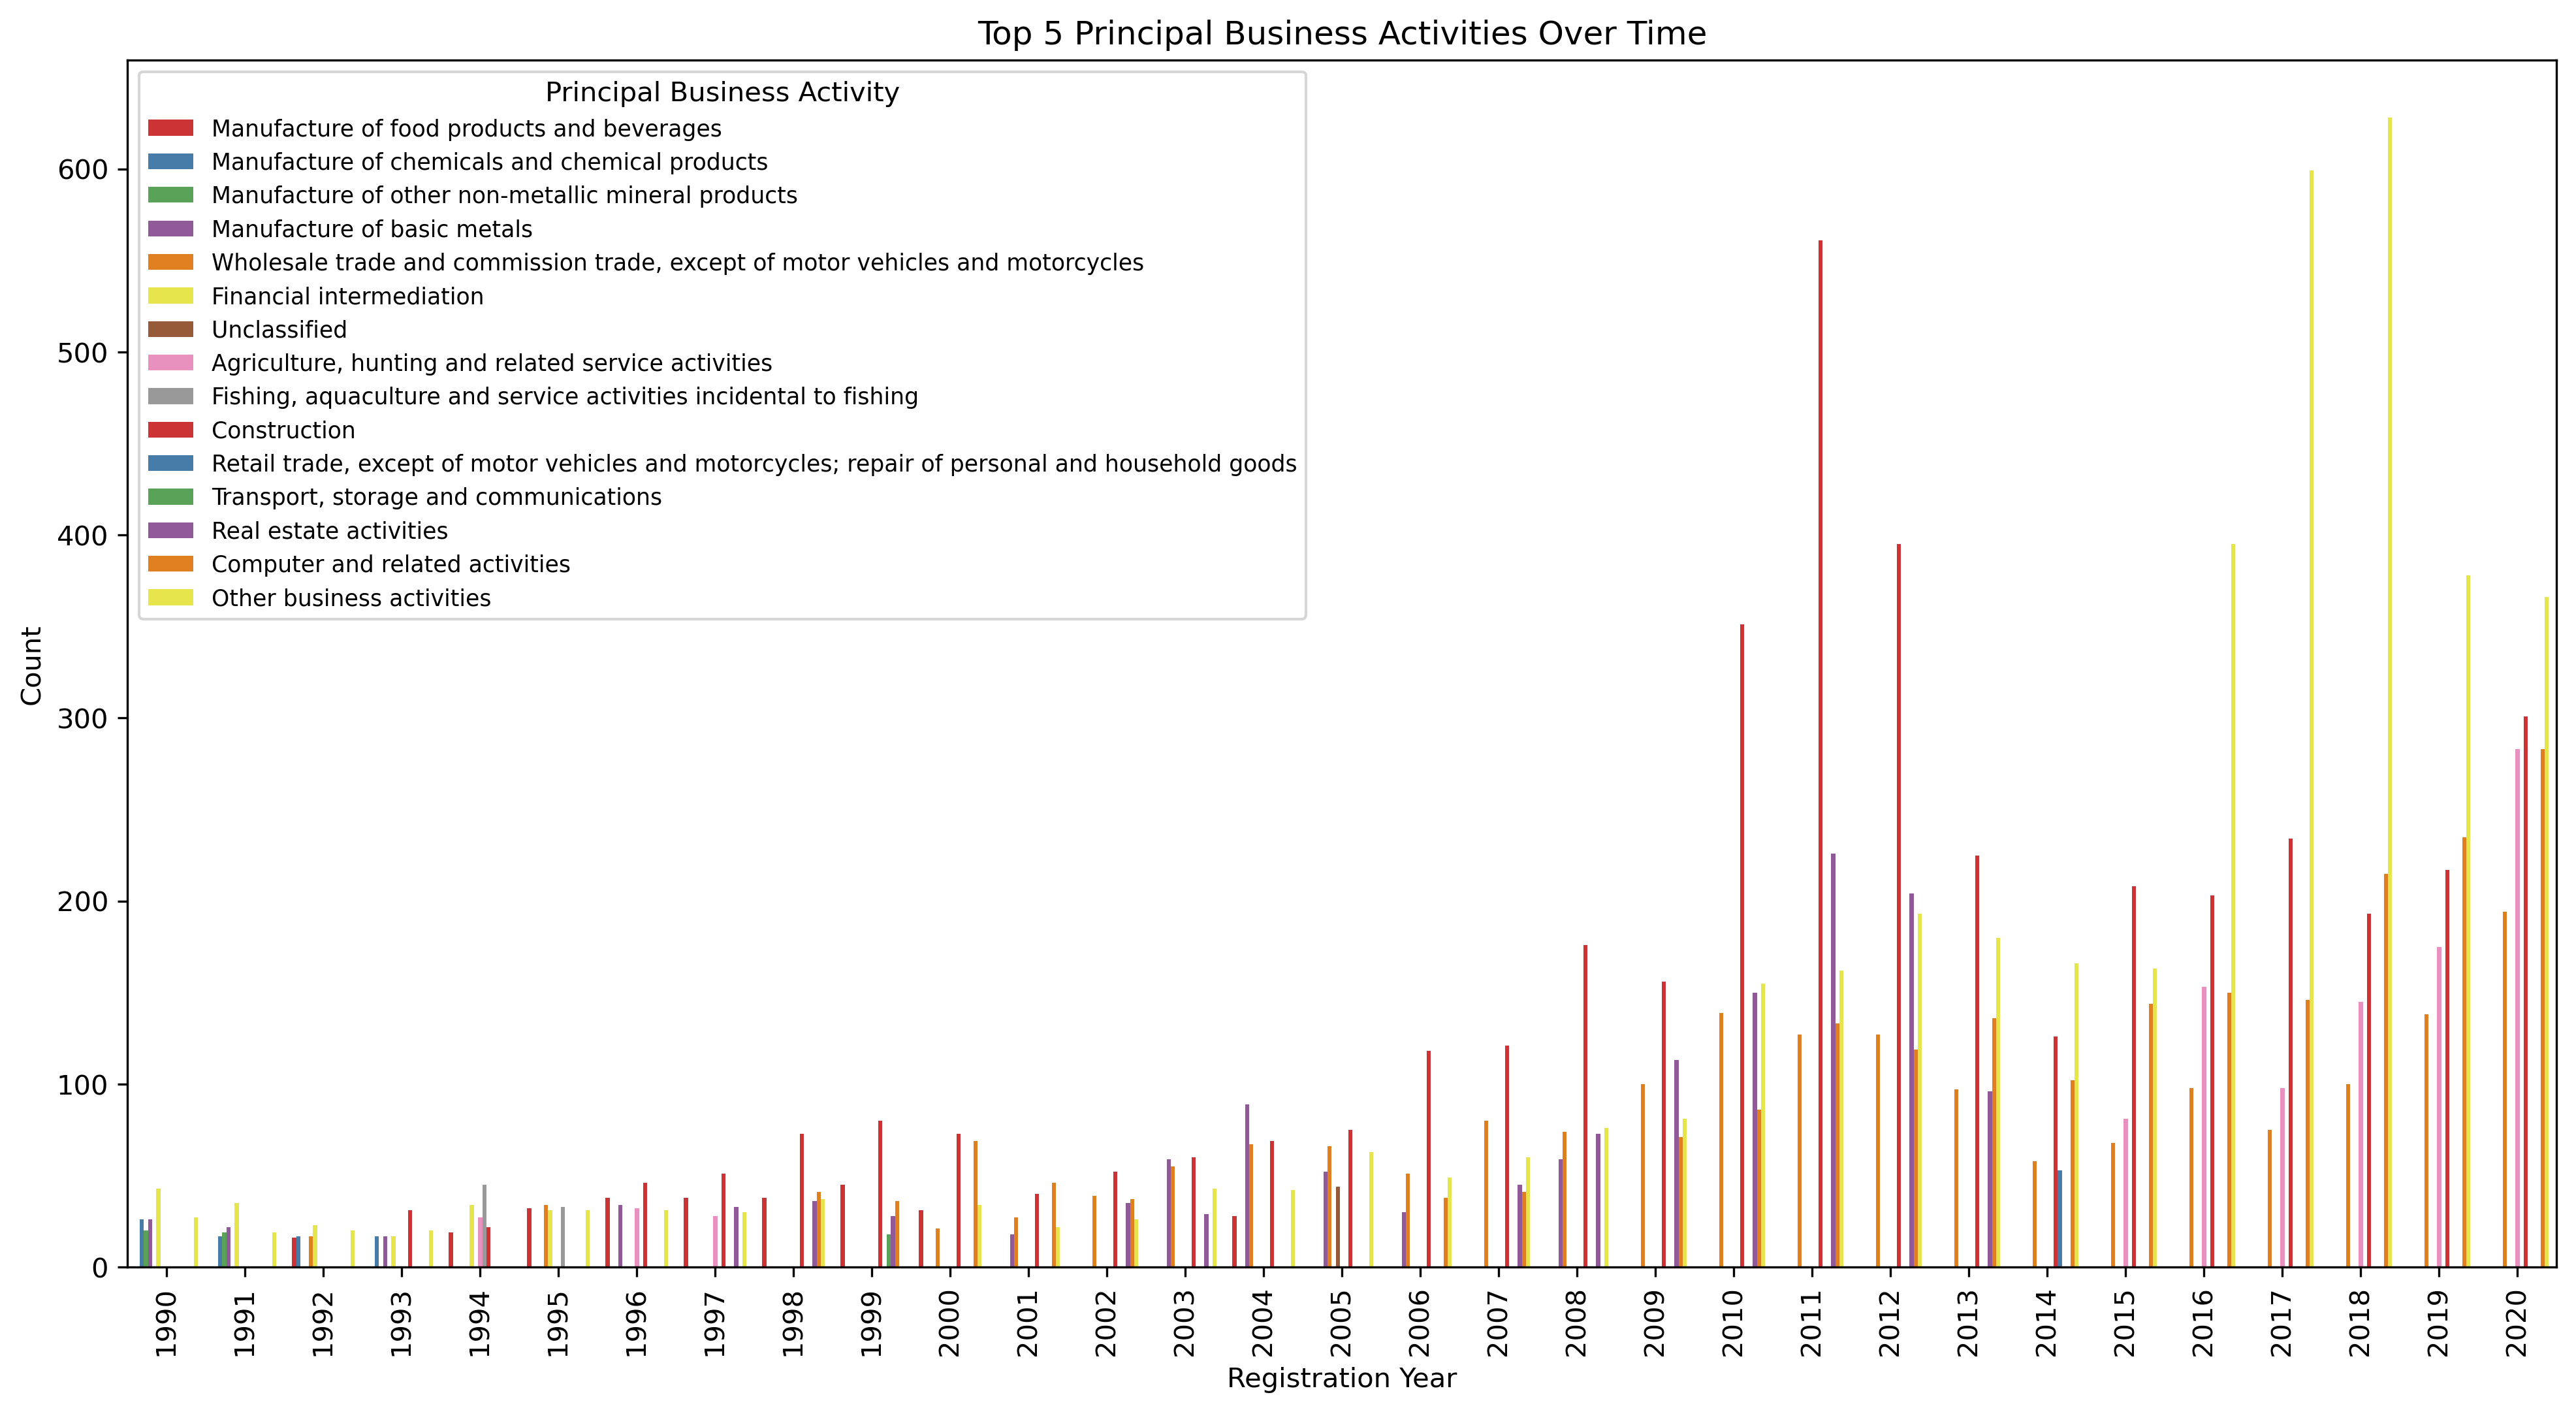

In [21]:
# Find the top 5 business activities for each year
top_activities = df.loc[(df['Registration_Year']>=1990) & (df['Registration_Year'] <= 2020)].groupby('Registration_Year')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].apply(lambda x: x.value_counts().nlargest(5).index.tolist())

# Filter the dataframe to include only the top activities
df_top_activities = df[df.apply(lambda x: x['Registration_Year'] in top_activities.index and x['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] in top_activities.loc[x['Registration_Year']], axis=1)]

plt.figure(figsize=(16, 8),dpi=300)
sns.countplot(x='Registration_Year', hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df_top_activities, palette='Set1')
plt.title('Top 5 Principal Business Activities Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Principal Business Activity', fontsize='small')
plt.show()

In [22]:
# Filter companies registered between 2013 and 2020
filtered_df = df[(df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

# Get the top 5 business activities
top_business_activities = filtered_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().head(5)

# Print the result
print("Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:")
print(top_business_activities)

Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:
Other business activities                                                         2875
Construction                                                                      1707
Computer and related activities                                                   1411
Agriculture, hunting and related service activities                               1036
Wholesale trade and commission trade, except of motor vehicles and motorcycles     828
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64


## Authorized capital

In [23]:
df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)
df.loc[:, 'PAIDUP_CAPITAL'] = df['PAIDUP_CAPITAL'].astype(float)
# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'AUTHORIZED_CAP' and 'PAIDUP_CAPITAL'
grouped_df = df.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')[['AUTHORIZED_CAP', 'PAIDUP_CAPITAL']].mean().reset_index()


C:\Users\kings\AppData\Local\Temp\ipykernel_19932\3258737060.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)


In [24]:
df = df.sort_values(by='Registration_Year')

# Calculate the percentage change in authorized capital for each activity over time
df['CAPITAL_CHANGE'] = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'Registration_Year'])['AUTHORIZED_CAP'].pct_change().fillna(0)

# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'CAPITAL_CHANGE'
activity_trend_df = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN','Registration_Year'])['CAPITAL_CHANGE'].mean().reset_index()

# Print the new DataFrame with the trend analysis
activity_trend_df2= activity_trend_df.interpolate()
activity_trend_df2


PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  Registration_Year  \
0     Activities of private households as employers ...               2011   
1     Activities of private households as employers ...               2013   
2     Activities of private households as employers ...               2015   
3     Activities of private households as employers ...               2018   
4     Activities of private households as employers ...               2019   
...                                                 ...                ...   
1917  Wholesale trade and commission trade, except o...               2066   
1918  Wholesale trade and commission trade, except o...               2067   
1919  Wholesale trade and commission trade, except o...               2070   
1920  Wholesale trade and commission trade, except o...               2071   
1921  Wholesale trade and commission trade, except o...               2072   

      CAPITAL_CHANGE  
0           0.000000  
1           4.500000  
2           0.000000  
3           0.000000  
4          99.500000  
...              ...  
1917       -0.357143  
1918        0.000000  
1919        0.000000  
1920        0.000000  
1921        0.000000  

[1922 rows x 3 columns]

## Comparison Score

In [25]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activity_1', 'Activity_2', 'Comparison'])

# Comparative Analysis: This compares the mean paid-up capital of all business activities.
# It helps in understanding their relative performance and market standing.
for i in range(len(grouped_df) - 1):
    for j in range(i + 1, len(grouped_df)):
        activity1_capital = grouped_df.loc[i, 'PAIDUP_CAPITAL']
        activity2_capital = grouped_df.loc[j, 'PAIDUP_CAPITAL']
        comparison = activity1_capital / activity2_capital
        new_row = pd.DataFrame({'Activity_1': [grouped_df.loc[i, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Activity_2': [grouped_df.loc[j, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Comparison': [comparison]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the results DataFrame
results_df


Activity_1  \
0     Activities of private households as employers ...   
1     Activities of private households as employers ...   
2     Activities of private households as employers ...   
3     Activities of private households as employers ...   
4     Activities of private households as employers ...   
...                                                 ...   
1270              Transport, storage and communications   
1271              Transport, storage and communications   
1272                                       Unclassified   
1273                                       Unclassified   
1274  Wholesale and retail trade ; repair of motor v...   

                                             Activity_2  Comparison  
0     Agriculture, hunting and related service activ...    0.045922  
1                       Computer and related activities    0.189060  
2                                          Construction    0.007034  
3                                             Education    0.185474  
4          Electricity, gas, steam and hot water supply    0.000396  
...                                                 ...         ...  
1270  Wholesale and retail trade ; repair of motor v...    0.510986  
1271  Wholesale trade and commission trade, except o...    0.617111  
1272  Wholesale and retail trade ; repair of motor v...    0.433561  
1273  Wholesale trade and commission trade, except o...    0.523606  
1274  Wholesale trade and commission trade, except o...    1.207686  

[1275 rows x 3 columns]

## Liquidity Ratios

In [26]:
df = df.copy()

# Calculate the liquidity ratio without warnings
df.loc[:, 'LIQUIDITY_RATIO'] = df['AUTHORIZED_CAP'] / df['PAIDUP_CAPITAL']

# Now, let's create a smaller DataFrame to showcase the liquidity ratios
# Selecting relevant columns for the smaller DataFrame
liquidity_df = df[['Company_Name', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'LIQUIDITY_RATIO']].copy()

# Displaying the smaller DataFrame
print("Smaller DataFrame showcasing Liquidity Ratios:")
liquidity_df

Smaller DataFrame showcasing Liquidity Ratios:


Company_Name  AUTHORIZED_CAP  \
26158           KHURDA HASTATANTA SILPANUSTAN SANGHA LTD             0.0   
5664                    INDIAN CARBIDE AND CHEMICALS LTD      17500000.0   
19474  NEW INDIA FINANCE(CHIT) AND TRADING COPRIVATE ...        200000.0   
16592              ORISSA BIDI MERCHANTS ASSOCIATION LTD             0.0   
6678                           SHREE DURGA GLASS LIMITED      10000000.0   
...                                                  ...             ...   
5699             J AND J PHARMACEUTICALS PRIVATE LIMITED        450000.0   
6937                  WESIX HUME PIPE INDUSTRIES PVT LTD       2000000.0   
24296                            S.N.CONSULTANCY PVT LTD         40000.0   
7818                  INDIAN METALS AND CARBIDES LIMITED      50000000.0   
3552                      SHREE GOPAL RICE MILLS PVT LTD        500000.0   

       PAIDUP_CAPITAL  LIQUIDITY_RATIO  
26158             0.0              NaN  
5664             70.0     2.500000e+05  
19474             0.0              inf  
16592             0.0              NaN  
6678        9568500.0     1.045096e+00  
...               ...              ...  
5699         345000.0     1.304348e+00  
6937         800000.0     2.500000e+00  
24296         30000.0     1.333333e+00  
7818       10799960.0     4.629647e+00  
3552          50000.0     1.000000e+01  

[30478 rows x 4 columns]

# Model

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


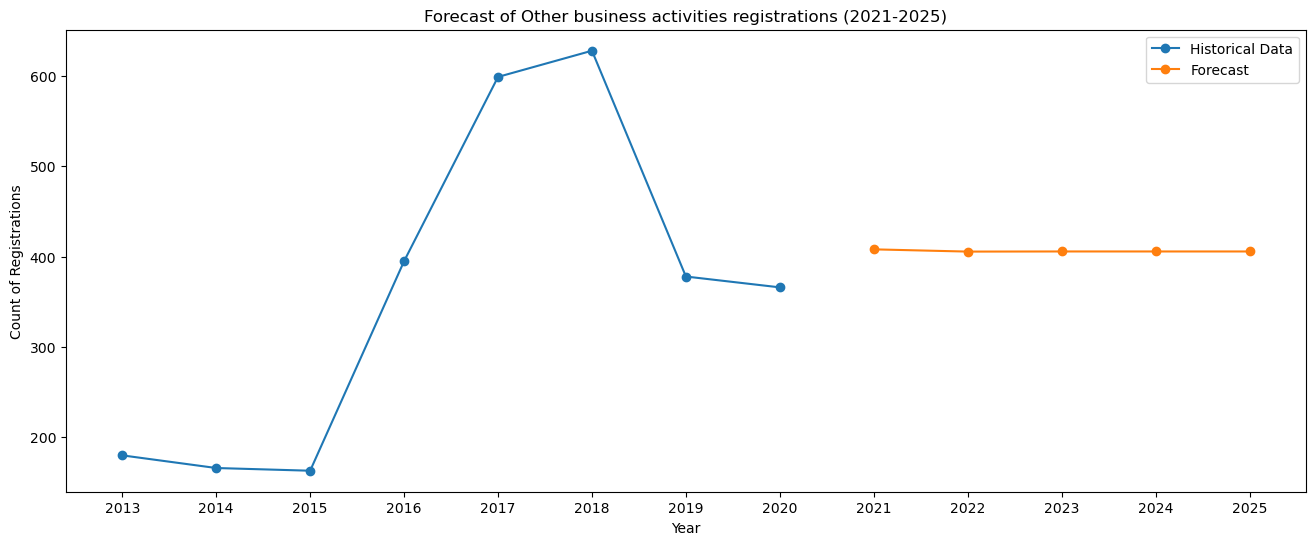

Forecasted registrations for Other business activities for 2021-2025:
2021-01-01    408.095402
2022-01-01    405.609070
2023-01-01    405.755923
2024-01-01    405.747249
2025-01-01    405.747761
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

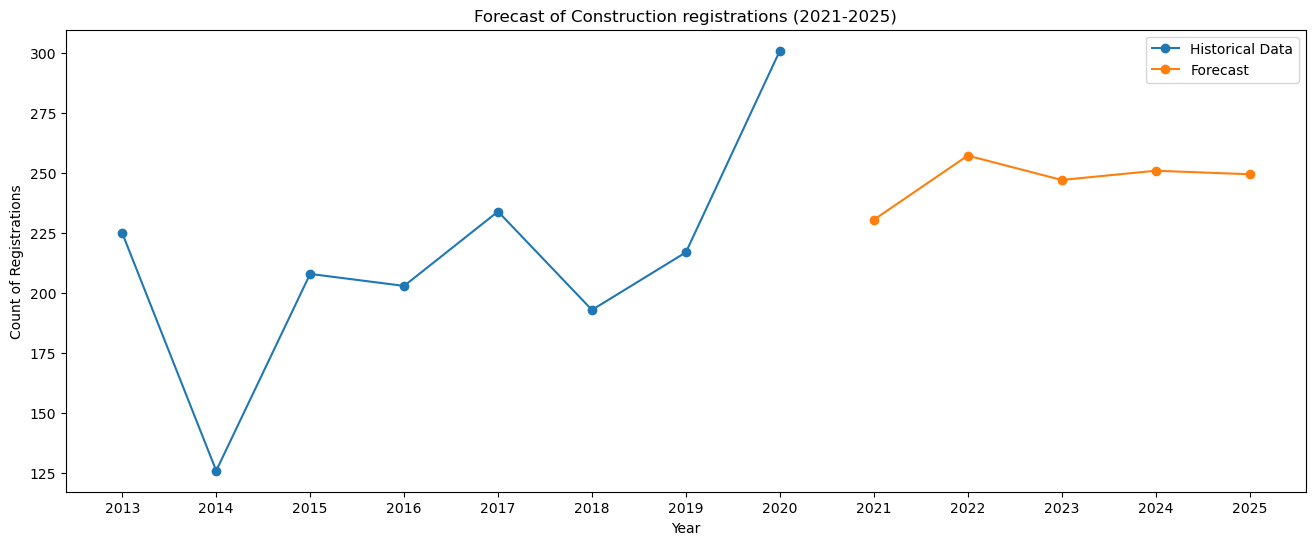

Forecasted registrations for Construction for 2021-2025:
2021-01-01    230.548597
2022-01-01    257.300212
2023-01-01    247.142162
2024-01-01    250.999349
2025-01-01    249.534708
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

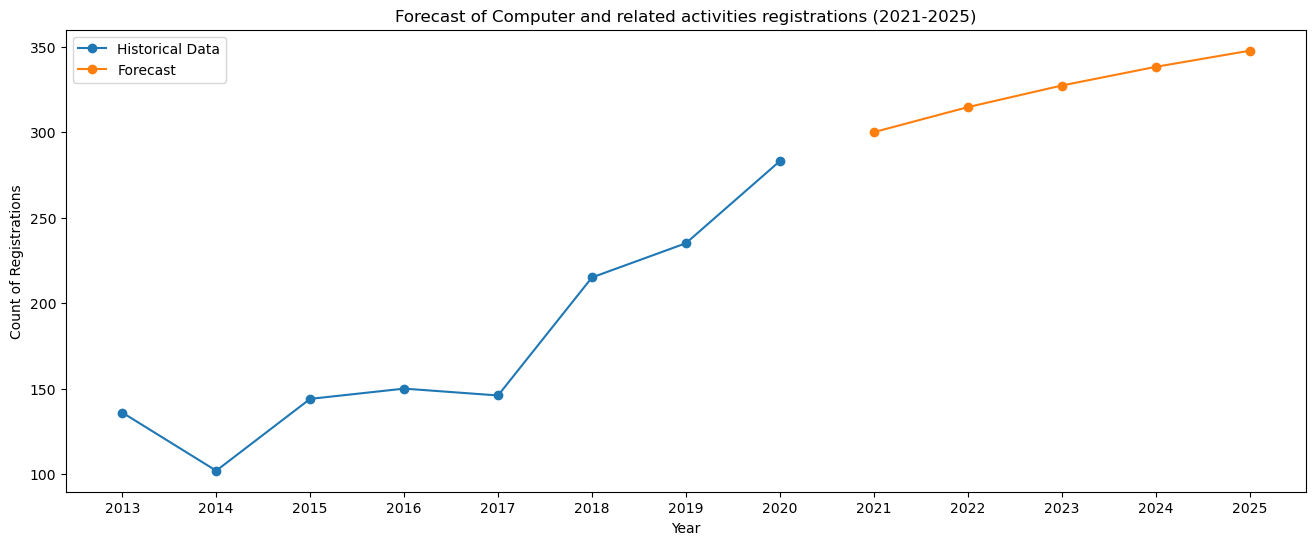

Forecasted registrations for Computer and related activities for 2021-2025:
2021-01-01    299.923636
2022-01-01    314.548386
2023-01-01    327.186526
2024-01-01    338.107917
2025-01-01    347.545759
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


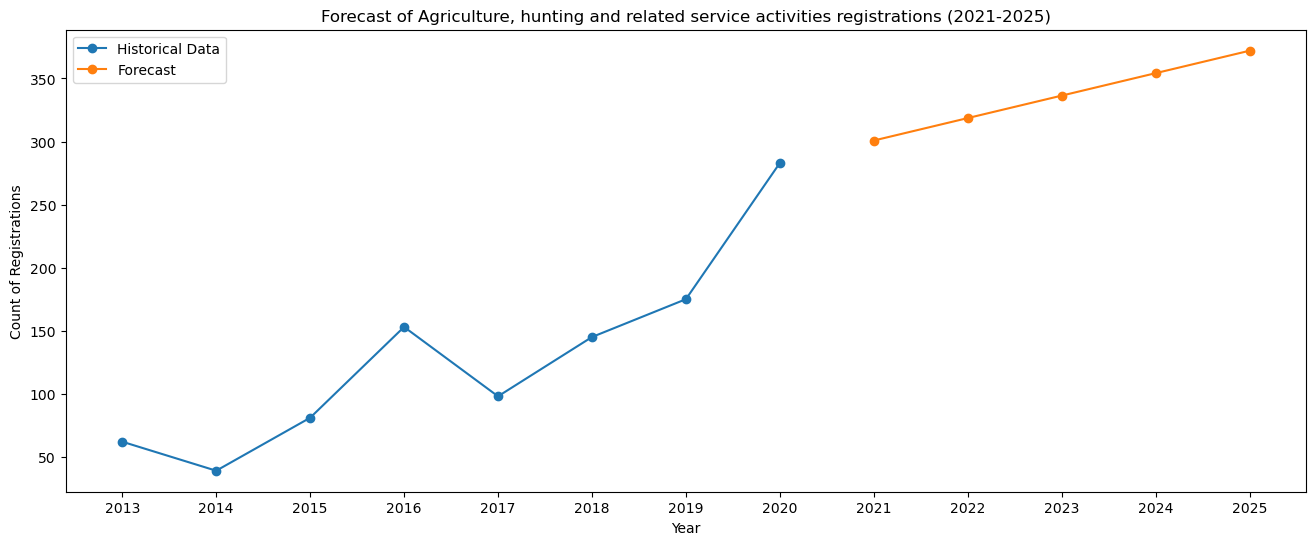

Forecasted registrations for Agriculture, hunting and related service activities for 2021-2025:
2021-01-01    300.806680
2022-01-01    318.611778
2023-01-01    336.415293
2024-01-01    354.217226
2025-01-01    372.017577
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


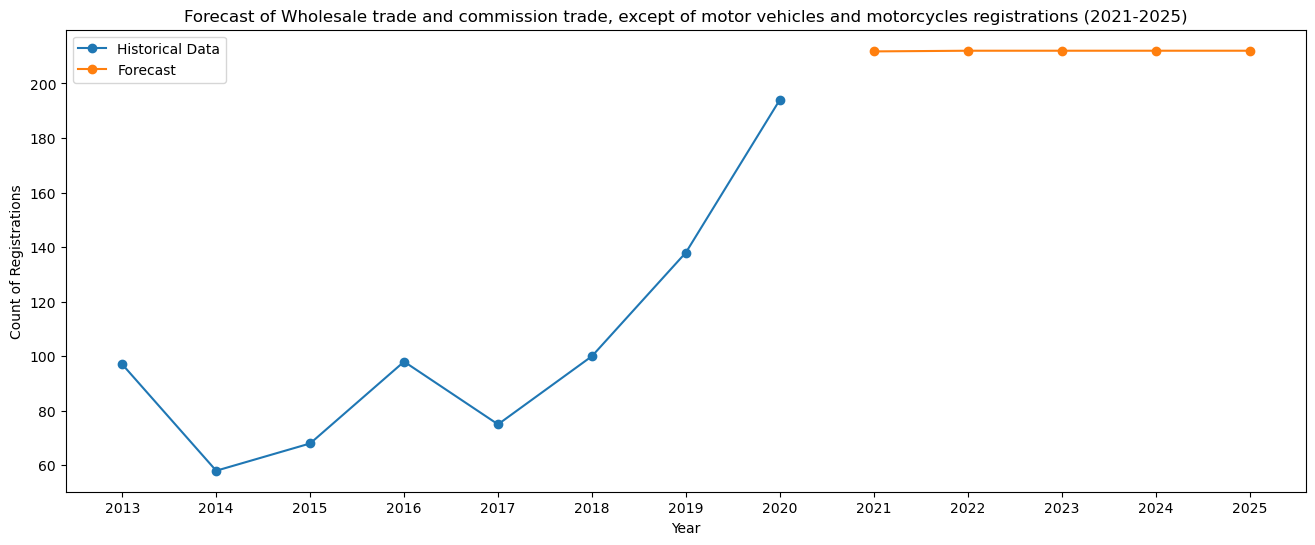

Forecasted registrations for Wholesale trade and commission trade, except of motor vehicles and motorcycles for 2021-2025:
2021-01-01    211.739709
2022-01-01    211.985354
2023-01-01    211.988756
2024-01-01    211.988803
2025-01-01    211.988804
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame
# Convert 'Latest_Year_AR' to datetime format
df['Latest_Year_AR'] = pd.to_datetime(df['Latest_Year_AR'], errors='coerce')

# Define the top 5 categories for forecasting
top_categories = [
    'Other business activities',
    'Construction',
    'Computer and related activities',
    'Agriculture, hunting and related service activities',
    'Wholesale trade and commission trade, except of motor vehicles and motorcycles',
]

# Loop through each category for forecasting
for category_to_forecast in top_categories:
    # Filter data for the specific category and the specified time range
    category_df = df[(df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] == category_to_forecast) & 
                     (df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

    # Extract relevant features and target variable
    X = category_df[['Registration_Year']]
    y = category_df.groupby('Registration_Year').size()

    # Convert 'Registration_Year' to DateTime format
    y.index = pd.to_datetime(y.index, format='%Y')

    # Fit ARIMA model
    model = ARIMA(y, order=(1, 1, 1))  # Adjust order as needed
    fit_model = model.fit()

    # Forecast registrations for the next 5 years (2021-2025)
    forecast_steps = 5
    forecast_values = fit_model.forecast(steps=forecast_steps)

    # Plot the forecast
    plt.figure(figsize=(16, 6))
    plt.plot(y.index.year, y.values, marker='o', label='Historical Data')
    plt.plot(range(y.index.year.max() + 1, y.index.year.max() + 1 + forecast_steps), forecast_values, marker='o', label='Forecast')
    plt.title(f'Forecast of {category_to_forecast} registrations (2021-2025)')
    plt.xticks(np.arange(2013, 2026, 1))
    plt.xlabel('Year')
    plt.ylabel('Count of Registrations')
    plt.legend()
    plt.show()

    # Display the forecasted values
    print(f"Forecasted registrations for {category_to_forecast} for 2021-2025:")
    print(forecast_values)